<a href="https://colab.research.google.com/github/ksheilla/Formative3_machine_learning/blob/main/Part%204%3A%20Gradient_Descent_in_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
# 1. INITIALIZE DATA AND PARAMETERS
x = np.array([1, 3])
y = np.array([3, 6])
m, b = -1.0, 1.0   # Starting values
learning_rate = 0.1
n = len(x)

# Lists to store history for visualization
m_history = [m]
b_history = [b]
error_history = []

In [3]:
iterations = 4

for i in range(iterations):
    # Step A: Compute predictions (Y_hat)
    y_pred = m * x + b

    # Step B: Derive Gradients (Manual Calculation logic)
    dm = (2/n) * np.sum(-x * (y - y_pred))
    db = (2/n) * np.sum(-(y - y_pred))

    # Step C: Update m and b
    m = m - (learning_rate * dm)
    b = b - (learning_rate * db)

    mse = np.mean((y - (m * x + b))**2)
    error_history.append(mse)

    # Store history
    m_history.append(m)
    b_history.append(b)

    print(f"Iteration {i+1}: m = {m:.4f}, b = {b:.4f}, MSE = {mse:.4f}")

# Final Predictions using the last m and b
final_y_pred = m * x + b
print(f"\nFinal Predictions: {final_y_pred}")

Iteration 1: m = 1.7000, b = 2.1000, MSE = 1.0400
Iteration 2: m = 1.2600, b = 1.9000, MSE = 0.0640
Iteration 3: m = 1.3400, b = 1.9160, MSE = 0.0348
Iteration 4: m = 1.3336, b = 1.8968, MSE = 0.0318

Final Predictions: [3.2304 5.8976]


In [4]:
def mse_cost(params):
    """MSE cost function for SciPy to minimize."""
    m_s, b_s = params
    y_pred_s = m_s * x + b_s
    return np.mean((y - y_pred_s) ** 2)

scipy_result = minimize(mse_cost, x0=[-1.0, 1.0], method='BFGS')
m_scipy, b_scipy = scipy_result.x

print("\n── SciPy Verification ──")
print(f"SciPy optimal m = {m_scipy:.6f},  b = {b_scipy:.6f}")
print(f"Our GD final  m = {m:.6f},         b = {b:.6f}")
print(f"(SciPy confirms gradient descent is converging to the correct answer)")


── SciPy Verification ──
SciPy optimal m = 1.500000,  b = 1.500000
Our GD final  m = 1.333600,         b = 1.896800
(SciPy confirms gradient descent is converging to the correct answer)


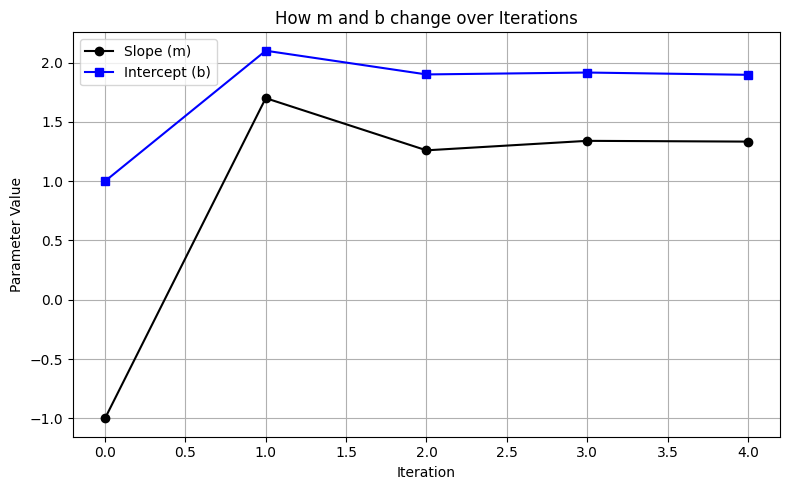

In [5]:
fig1 = plt.figure(figsize=(8, 5))
plt.plot(m_history, label='Slope (m)',      marker='o', color='black')
plt.plot(b_history, label='Intercept (b)', marker='s', color='blue')
plt.title("How m and b change over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Parameter Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

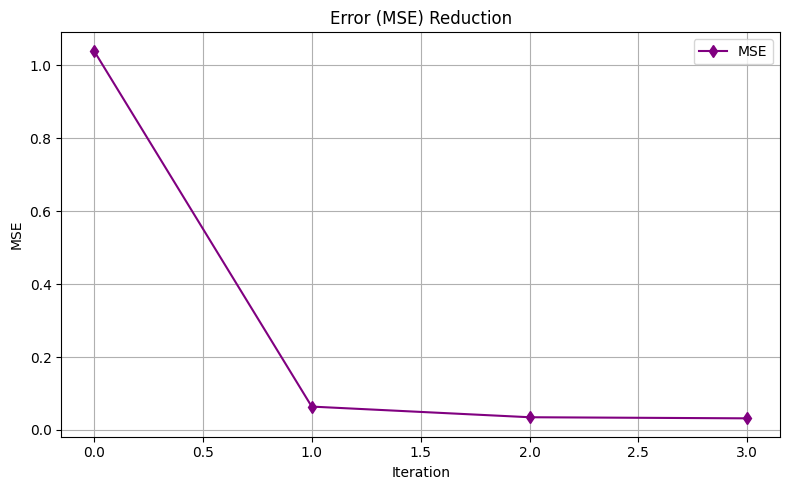

In [6]:
fig2 = plt.figure(figsize=(8, 5))           # ← separate figure
plt.plot(error_history, label='MSE', marker='d', color='purple')
plt.title("Error (MSE) Reduction")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()